<a href="https://colab.research.google.com/github/ahhill27/scratchpad/blob/main/NB_2026_0122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/ahhill27/scratchpad

fatal: destination path 'scratchpad' already exists and is not an empty directory.


In [4]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()



Download complete
Extracting data files...
Data extracted


In [7]:
import pandas as pd
df= pd.read_csv('/content/data/craigslist_cville_cars.csv')

df.head()

,Unnamed: 0,title,price,year,link,brand,age
0,0,a sweet sedan avalon xle plus,24000,NaN,https://charlottesville.craigslist.org/cto/d/c...,missing,NaN
1,1,"1998 gmc sierra 1500 sl truck auto rwd <103,00...",6950,1998.0,https://charlottesville.craigslist.org/cto/d/l...,gmc,27.0
2,2,gmc sierra 3500hd 6.6 duramax diesel dually,26000,NaN,https://charlottesville.craigslist.org/cto/d/c...,gmc,NaN
3,3,2007 chrysler sebring,2900,2007.0,https://charlottesville.craigslist.org/cto/d/c...,missing,18.0
4,4,2012 nissan versa sl,3500,2012.0,https://charlottesville.craigslist.org/cto/d/c...,missing,13.0


<Axes: >

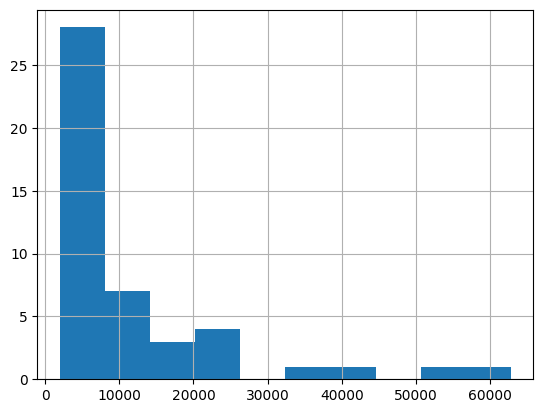

In [10]:
df['price'].describe()
df['price'].hist()

In [11]:
df['year'].describe()

,year
count,41.000000
mean,2000.878049
std,16.315936
min,1957.000000
25%,1994.000000
50%,2006.000000
75%,2012.000000
max,2019.000000


In [20]:
df['year_na']=df['year'].isna()

imputation_value=df['year'].median() #depending on the context, putting median in for the imputation value may be good or bad

df['year_imp']= df['year'].fillna(imputation_value)

df['year_imp']


,year_imp
0,2006.0
1,1998.0
2,2006.0
3,2007.0
4,2012.0
5,2003.0
6,2012.0
7,2008.0
8,2013.0
9,2014.0


In [21]:
df['brand'].value_counts()

,count
brand,
missing,14
honda,5
chevrolet,4
toyota,4
ford,3
chevy,3
bmw,3
jeep,2
gmc,2


In [24]:
#row filtering

df.loc[df['brand']=='honda', :] #all the columns

df.loc[df['brand']=='honda', :]

,Unnamed: 0,title,price,year,link,brand,age,year_na,year_imp
23,23,2012 honda civic lx,5900,2012.0,https://charlottesville.craigslist.org/cto/d/h...,honda,13.0,False,2012.0
33,33,2006 honda pilot exl fwd,4700,2006.0,https://charlottesville.craigslist.org/cto/d/h...,honda,19.0,False,2006.0
41,41,2010 honda crv lx,6500,2010.0,https://charlottesville.craigslist.org/cto/d/h...,honda,15.0,False,2010.0
43,43,sold haters 1992 honda accord gas sipper sold,2300,1992.0,https://charlottesville.craigslist.org/cto/d/c...,honda,33.0,False,1992.0
45,45,2015 honda fit,8749,2015.0,https://charlottesville.craigslist.org/cto/d/c...,honda,10.0,False,2015.0


In [ ]:
#cleaning numeric variables is the biggest part of cleaning data

<Axes: xlabel='price', ylabel='Count'>

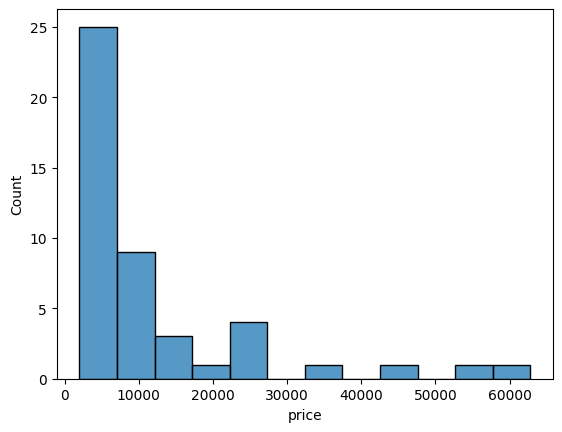

In [25]:
import seaborn as sns

sns.histplot(df['price'])

In [29]:
import pandas as pd
df= pd.read_csv("/content/data/airbnb_NYC.csv", encoding='latin1')

In [36]:
x= df['Price'].str.replace(',', '')
x= pd.to_numeric(x, errors='coerce')


<Axes: xlabel='Price', ylabel='Count'>

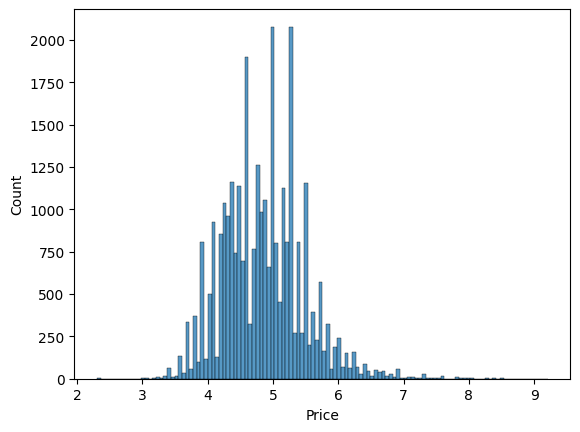

In [34]:
import numpy as np
y=np.log(x)
sns.histplot(y)

<Axes: xlabel='Price', ylabel='Density'>

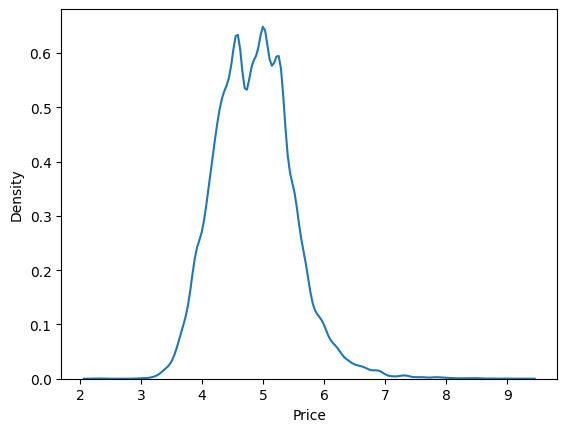

In [37]:
sns.kdeplot(y) #this kernel-density plot will put a bell curve on individual value points and sum them up on average

<Axes: xlabel='close', ylabel='Count'>

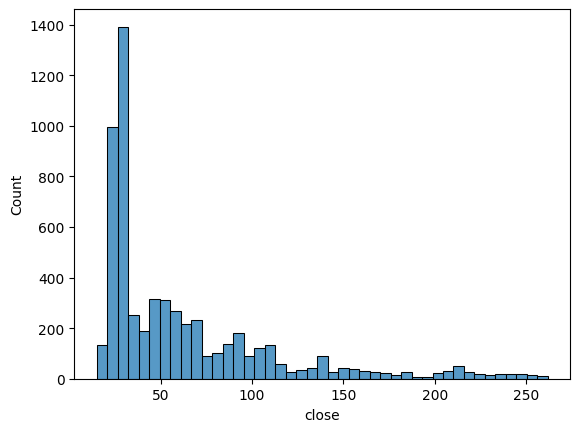

In [52]:
import pandas as pd
df= pd.read_csv('/content/data/tech_stocks.csv')

df.head()

MSFT_close= df.loc[ df['symbol']=='MSFT', 'close']

sns.histplot(MSFT_close)


<Axes: xlabel='close', ylabel='Count'>

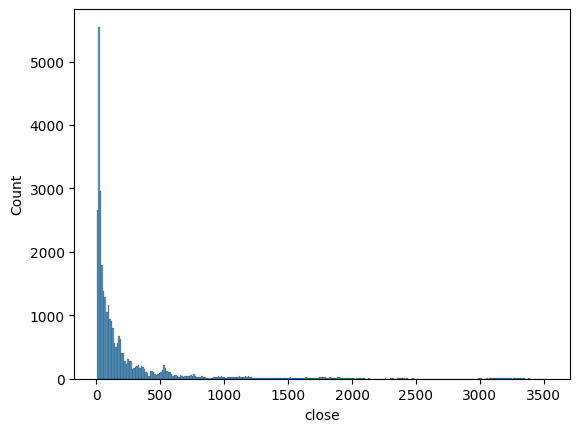

In [40]:
sns.histplot(df['close'])

<Axes: xlabel='close', ylabel='Density'>

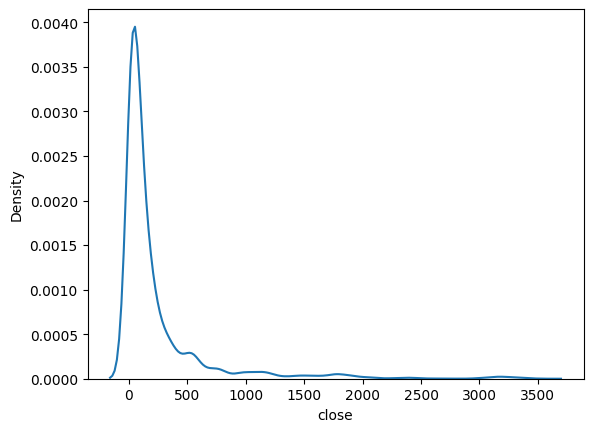

In [41]:
sns.kdeplot(df['close'])

<Axes: xlabel='MSFT_close', ylabel='Count'>

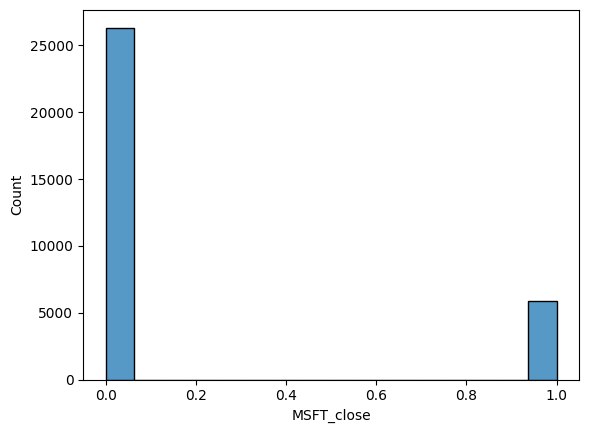

In [44]:
sns.histplot(df['MSFT_close'])

<Axes: xlabel='close', ylabel='Density'>

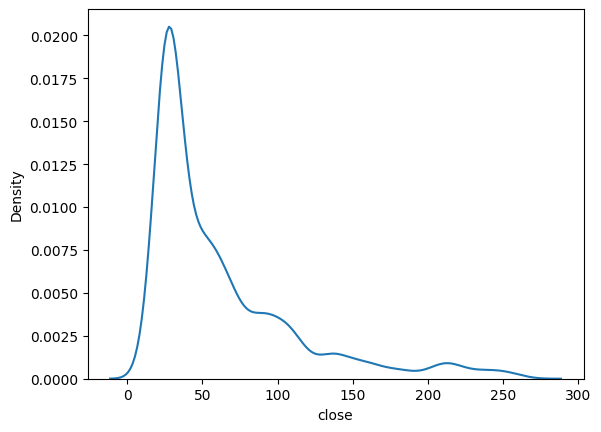

In [51]:
sns.kdeplot(MSFT_close)